<a href="https://colab.research.google.com/github/puskuriashwitha/Task-4-Classification-with-Logistic-Regression-/blob/main/(Task_4)Classification_with_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ⿡ Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# ⿢ Load Dataset
df = pd.read_csv("Titanic-Dataset.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# ⿣ Handle missing values (if any)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-3-1113299264.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3-1113299264.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [4]:
# ⿤ Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})



In [5]:
# ⿥ Select Features and Target
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']


In [6]:
# ⿦ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [7]:
# ⿧ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# ⿨ Fit Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train);



In [9]:
# ⿩ Predict
y_pred = model.predict(X_test)


In [10]:
# 🔟 Evaluate: Confusion Matrix & Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[93 17]
 [18 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [11]:
# 🔢 ROC Curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)


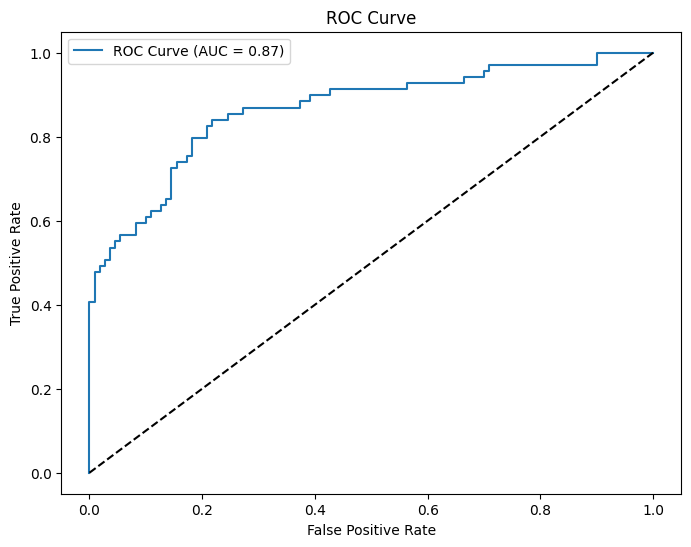

In [12]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [14]:
# 🔍 *Custom Threshold Tuning Example (at 0.4)*
custom_threshold = 0.4
y_pred_custom = (y_proba >= custom_threshold).astype(int)

cm_custom = confusion_matrix(y_test, y_pred_custom)
print(f"\nConfusion Matrix with 0.4 Threshold:\n{cm_custom}")
print("\nClassification Report with 0.4 Threshold:\n", classification_report(y_test, y_pred_custom))


Confusion Matrix with 0.4 Threshold:
[[86 24]
 [11 58]]

Classification Report with 0.4 Threshold:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.71      0.84      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.80      0.81       179

